In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#loading data
df = pd.read_csv("/content/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#shape of data
df.shape


(891, 12)

In [4]:
#Basic data inspection
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
#Handling missing values

#Fill numerical with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

#Drop high-missing columns
df = df.drop(columns=['Cabin'])

#Fill categorical
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [6]:
#Data Cleaning

#Remove unnecessary columns
df = df.drop(columns=['PassengerId','Name','Ticket'])

#Remove duplicates
df = df.drop_duplicates()


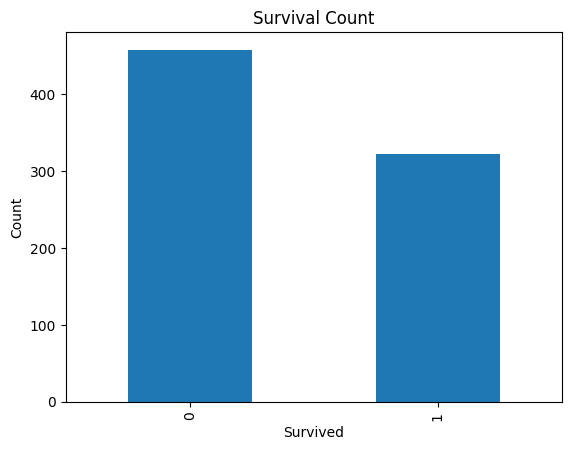

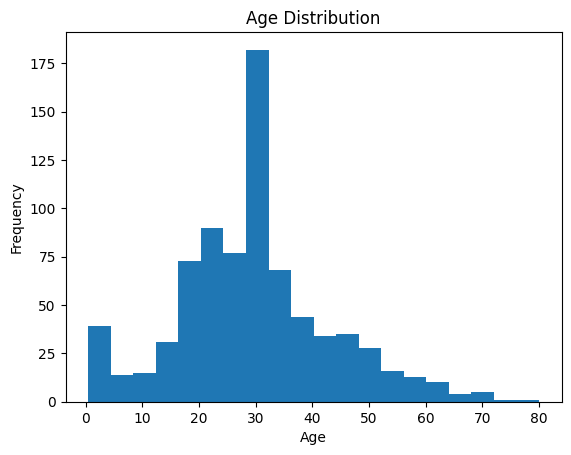

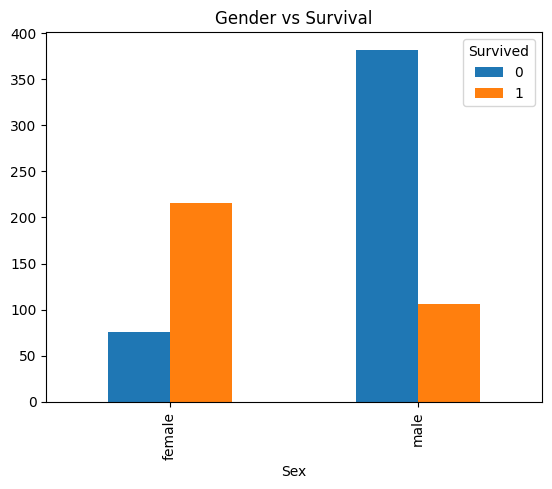

In [7]:
#Data Visualization

#Survival Count
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

#Age Distribution
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#Gender vs Survival
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar')
plt.title("Gender vs Survival")
plt.show()




In [8]:
#Feature Engineering

#Create Family Size Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#Create IsAlone Feature
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)


In [9]:
#Data Encoding

#Encode Gender
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

#One-Hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)




In [10]:
#Final Clean Dataset
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    780 non-null    int64  
 1   Pclass      780 non-null    int64  
 2   Sex         780 non-null    int64  
 3   Age         780 non-null    float64
 4   SibSp       780 non-null    int64  
 5   Parch       780 non-null    int64  
 6   Fare        780 non-null    float64
 7   FamilySize  780 non-null    int64  
 8   IsAlone     780 non-null    int64  
 9   Embarked_Q  780 non-null    bool   
 10  Embarked_S  780 non-null    bool   
dtypes: bool(2), float64(2), int64(7)
memory usage: 62.5 KB


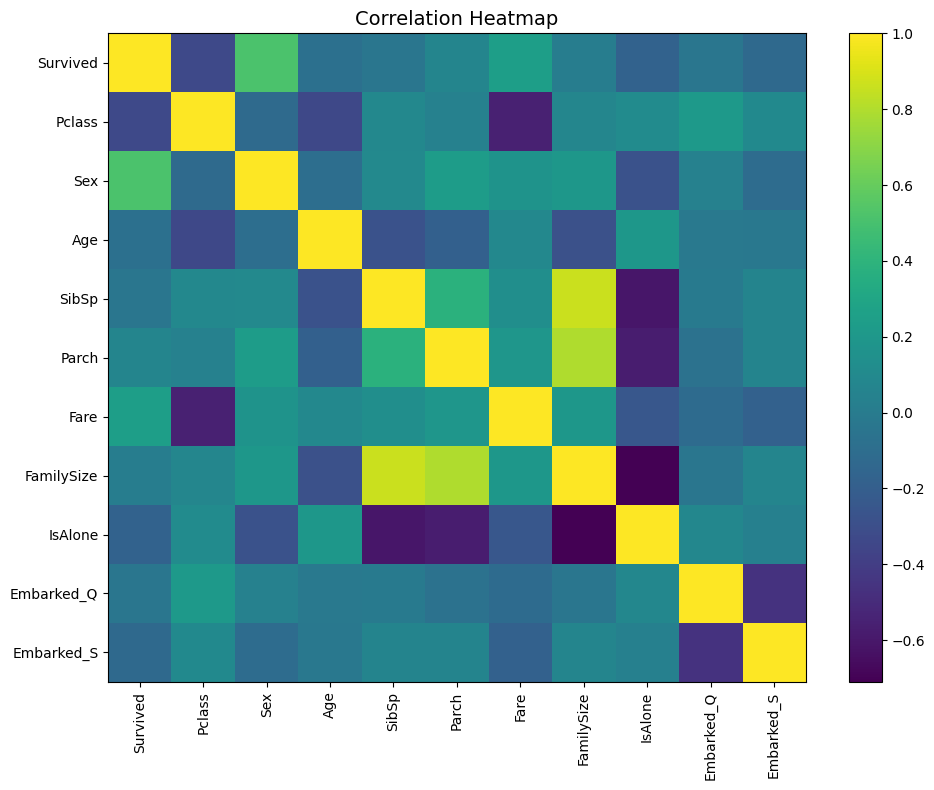

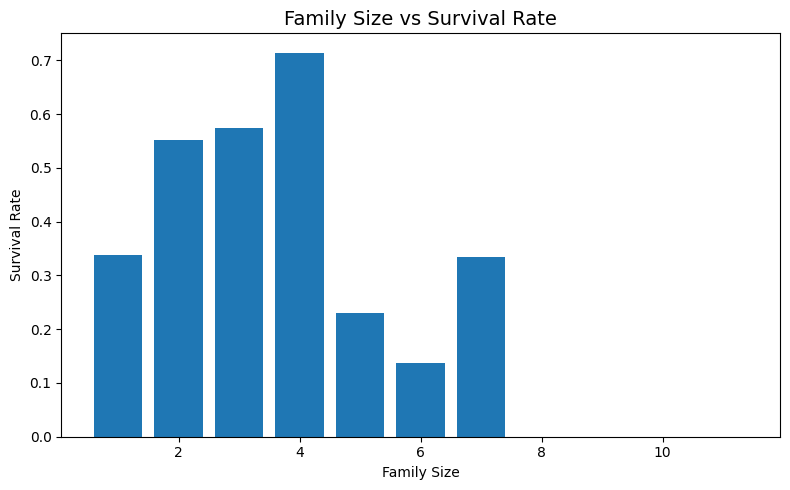

In [11]:
#Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(corr_matrix.columns)),
           labels=corr_matrix.columns,
           rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)),
           labels=corr_matrix.columns)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

#FamilySize vs Survival
family_survival = df.groupby('FamilySize')['Survived'].mean()
plt.figure(figsize=(8, 5))
plt.bar(family_survival.index, family_survival.values)
plt.title("Family Size vs Survival Rate", fontsize=14)
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.tight_layout()
plt.show()
